In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
import numpy as np

In [2]:
final_df = pd.read_csv('../data/FINAL_DATA_v2.csv')
final_df.head(3)

,temperature_2m,relativehumidity_2m,dewpoint_2m,apparent_temperature,pressure_msl,surface_pressure,precipitation,rain,snowfall,cloudcover,...,x0_UA 760,x0_UA 776,x0_UA 790,x0_UA 794,x0_UA 849,x0_UA 964,x0_DEN,x0_EWR,x0_IAD,x0_ORD
0,-1.2,75,-5.1,-6.5,1025.6,841.8,0.2,0.0,0.14,100,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,1.1,43,-10.2,-2.2,1027.6,844.8,0.0,0.0,0.00,1,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,5.1,52,-4.0,1.8,1021.2,841.9,0.0,0.0,0.00,0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [6]:
df = final_df.loc[:, [x for x in final_df.columns.tolist() if not x.startswith('x0')]]

In [7]:
df.head(3)

,temperature_2m,relativehumidity_2m,dewpoint_2m,apparent_temperature,pressure_msl,surface_pressure,precipitation,rain,snowfall,cloudcover,...,syr_cloudcover,syr_cloudcover_low,syr_cloudcover_mid,syr_cloudcover_high,syr_windspeed_10m,syr_winddirection_10m,syr_windgusts_10m,syr_et0_fao_evapotranspiration,syr_vapor_pressure_deficit,arrival_status
0,-1.2,75,-5.1,-6.5,1025.6,841.8,0.2,0.0,0.14,100,...,81,0,98,73,23.1,267,49.0,0.14,0.46,early
1,1.1,43,-10.2,-2.2,1027.6,844.8,0.0,0.0,0.00,1,...,97,96,17,0,19.9,167,44.6,0.09,0.20,delayed
2,5.1,52,-4.0,1.8,1021.2,841.9,0.0,0.0,0.00,0,...,100,93,67,0,8.9,137,24.1,0.10,0.14,on_time


<AxesSubplot:>

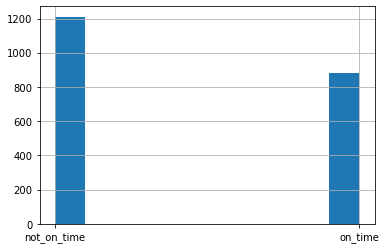

In [14]:
df_lvl1 = df.copy()
df_lvl1['arrival_status'] = df_lvl1['arrival_status'].apply(lambda x: x if x == 'on_time' else 'not_on_time')
df_lvl1.arrival_status.hist()

In [25]:
lvl1_scaler = StandardScaler()
X_lvl1 = df_lvl1.loc[:, ~df_lvl1.columns.isin(['arrival_status'])]
Y_lvl1 = df_lvl1.loc[:, 'arrival_status']

X_tr_l1, X_te_l1, Y_tr_l1, Y_te_l1 = train_test_split(
    X_lvl1, Y_lvl1, test_size=0.25, shuffle=True, stratify=Y_lvl1
)

X_tr_l1_scaled = lvl1_scaler.fit_transform(X_tr_l1)
X_te_l1_scaled = lvl1_scaler.transform(X_te_l1)

lvl1_model = RandomForestClassifier(
    n_estimators=150,
    max_depth=120,
    min_samples_leaf=2,
    min_samples_split=3,
    max_features=None,
    random_state=69420
).fit(X_tr_l1_scaled, Y_tr_l1)

lvl1_model.score(X_te_l1_scaled, Y_te_l1)

0.6042065009560229

<AxesSubplot:>

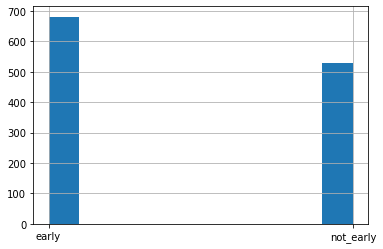

In [27]:
df_lvl2 = df.copy()
df_lvl2 = df_lvl2.loc[df_lvl2.arrival_status != "on_time", :]

df_lvl2['arrival_status'] = df_lvl2['arrival_status'].apply(lambda x: x if x == 'early' else 'not_early')
df_lvl2['arrival_status'].hist()

In [28]:
lvl2_scaler = StandardScaler()
X_lvl2 = df_lvl2.loc[:, ~df_lvl2.columns.isin(['arrival_status'])]
Y_lvl2 = df_lvl2.loc[:, 'arrival_status']

X_tr_l2, X_te_l2, Y_tr_l2, Y_te_l2 = train_test_split(
    X_lvl2, Y_lvl2, test_size=0.25, shuffle=True, stratify=Y_lvl2
)

X_tr_l2_scaled = lvl2_scaler.fit_transform(X_tr_l2)
X_te_l2_scaled = lvl2_scaler.transform(X_te_l2)

lvl2_model = RandomForestClassifier(
    n_estimators=150,
    max_depth=120,
    min_samples_leaf=2,
    min_samples_split=3,
    max_features=None,
    random_state=69420
).fit(X_tr_l2_scaled, Y_tr_l2)

lvl2_model.score(X_te_l2_scaled, Y_te_l2)

0.6501650165016502

<AxesSubplot:>

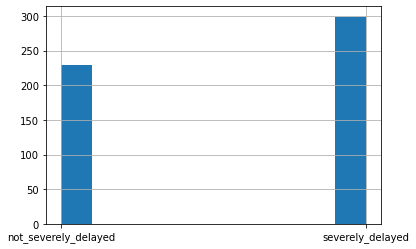

In [29]:
df_lvl3 = df.copy()
df_lvl3 = df_lvl3.loc[df_lvl3.arrival_status.isin(['delayed', 'severely_delayed']), :]

df_lvl3['arrival_status'] = df_lvl3['arrival_status'].apply(
    lambda x: x if x == 'severely_delayed' else 'not_severely_delayed'
)

df_lvl3['arrival_status'].hist()